## Here we will develop the Regression Models with Random Forest. We will compare the different ML models also.


In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

Load the data

In [2]:
df = pd.read_csv('ml_data_pIC50_pubchem_fp.csv')
df = df

Output variable (Y): plc50 and input variables(X) 881 column

In [3]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

In [4]:
X.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
Y.head()

0    5.148742
1    4.301030
2    6.623423
3    7.244125
4    7.267606
Name: pIC50, dtype: float64

Remove the low variance data from X 

In [6]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [7]:
X.shape

(2816, 152)

Split the train and test set to 80/20 ratio

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [9]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((2252, 152), (2252,), (564, 152), (564,))

Building the regression model using the Random Forest

In [10]:
import numpy as np
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.32783654886434255

## Let's compare different ML models.

In [ ]:
# lazypredict is used to test the results.
! pip install lazypredict

In [11]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [21]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
train_model , test_model = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [01:39<00:00,  2.36s/it]


In [22]:
train_model

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.13,0.37,1.11,2.67
HistGradientBoostingRegressor,0.13,0.37,1.11,21.16
NuSVR,0.10,0.34,1.13,2.82
RandomForestRegressor,0.09,0.34,1.14,6.18
GradientBoostingRegressor,0.09,0.33,1.14,2.93
SVR,0.08,0.33,1.14,4.46
BaggingRegressor,0.06,0.32,1.15,0.84
XGBRegressor,0.03,0.29,1.18,4.23
MLPRegressor,0.02,0.28,1.18,7.16


In [23]:
test_model

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.13,0.37,1.11,2.67
HistGradientBoostingRegressor,0.13,0.37,1.11,21.16
NuSVR,0.10,0.34,1.13,2.82
RandomForestRegressor,0.09,0.34,1.14,6.18
GradientBoostingRegressor,0.09,0.33,1.14,2.93
SVR,0.08,0.33,1.14,4.46
BaggingRegressor,0.06,0.32,1.15,0.84
XGBRegressor,0.03,0.29,1.18,4.23
MLPRegressor,0.02,0.28,1.18,7.16


[(0.0, 1.0)]

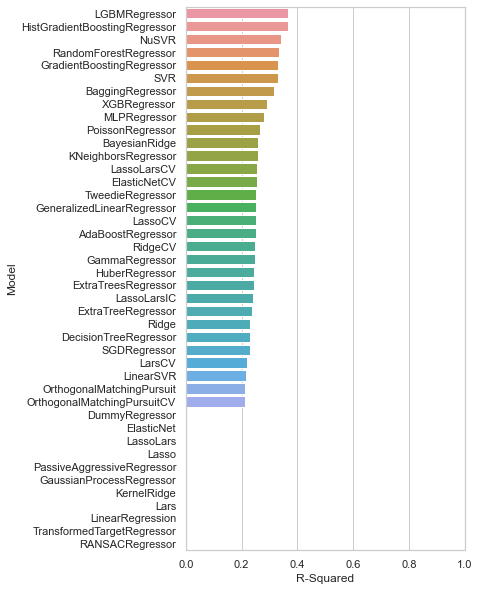

In [24]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train_model.index, x="R-Squared", data=train_model)
ax.set(xlim=(0, 1))

## Here we see LGBMRegresso is the best model. 